In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay,RocCurveDisplay,precision_score,roc_curve
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('./data/dataset.csv')
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing Hyphen from strings

In [3]:
for col in df.columns:
    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for null and NaN values

In [4]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


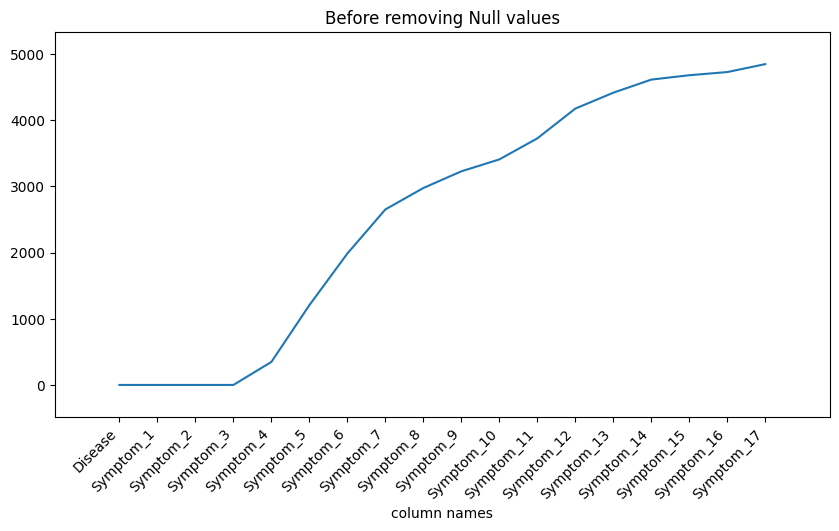

In [6]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [5]:
cols = df.columns
data = df[cols].values.flatten()
s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)
df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [7]:
df1 = pd.read_csv('./data/Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


Encode symptoms in the data with the symptom rank

In [42]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


In [9]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


In [10]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

C:\Users\criti\AppData\Local\Temp\ipykernel_14284\969436745.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = d.replace('dischromic  patches', 0)
C:\Users\criti\AppData\Local\Temp\ipykernel_14284\969436745.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = d.replace('spotting  urination',0)
C:\Users\criti\AppData\Local\Temp\ipykernel_14284\969436745.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objec

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


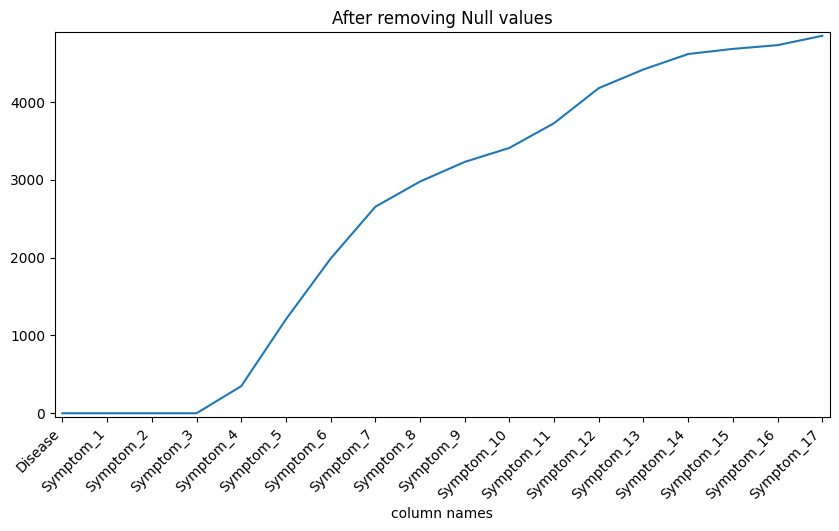

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

Select the features as symptoms column and label as Disease column


In [11]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

Splitting the dataset to training (80%) and testing (20%)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


Logistic regression

In [13]:
def confusion_plot(model, X_test, y_test):
    plt.figure(figsize=(8, 8), dpi=150)
    
    y_pred = model.predict(X_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
    
    sns.heatmap(df_cm, annot=True)

In [14]:
def create_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy : {acc*100:.4f} %\n")
    print("Classification report: \n")
    print(report)

In [68]:
lr_model = LogisticRegression(solver='saga', max_iter=2500)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=2500, solver='saga')

In [69]:
create_report(lr_model, x_test, y_test)

Accuracy : 91.7683 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.94      0.83      0.88        18
                                   AIDS       0.72      0.90      0.80        20
                                   Acne       1.00      1.00      1.00        32
                    Alcoholic hepatitis       1.00      0.83      0.91        29
                                Allergy       0.64      0.84      0.73        19
                              Arthritis       0.94      0.97      0.95        31
                       Bronchial Asthma       0.78      0.64      0.71        28
                   Cervical spondylosis       0.71      0.80      0.75        30
                            Chicken pox       1.00      1.00      1.00        27
                    Chronic cholestasis       0.82      0.95      0.88        19
                            Common Cold       1.00      1.00 

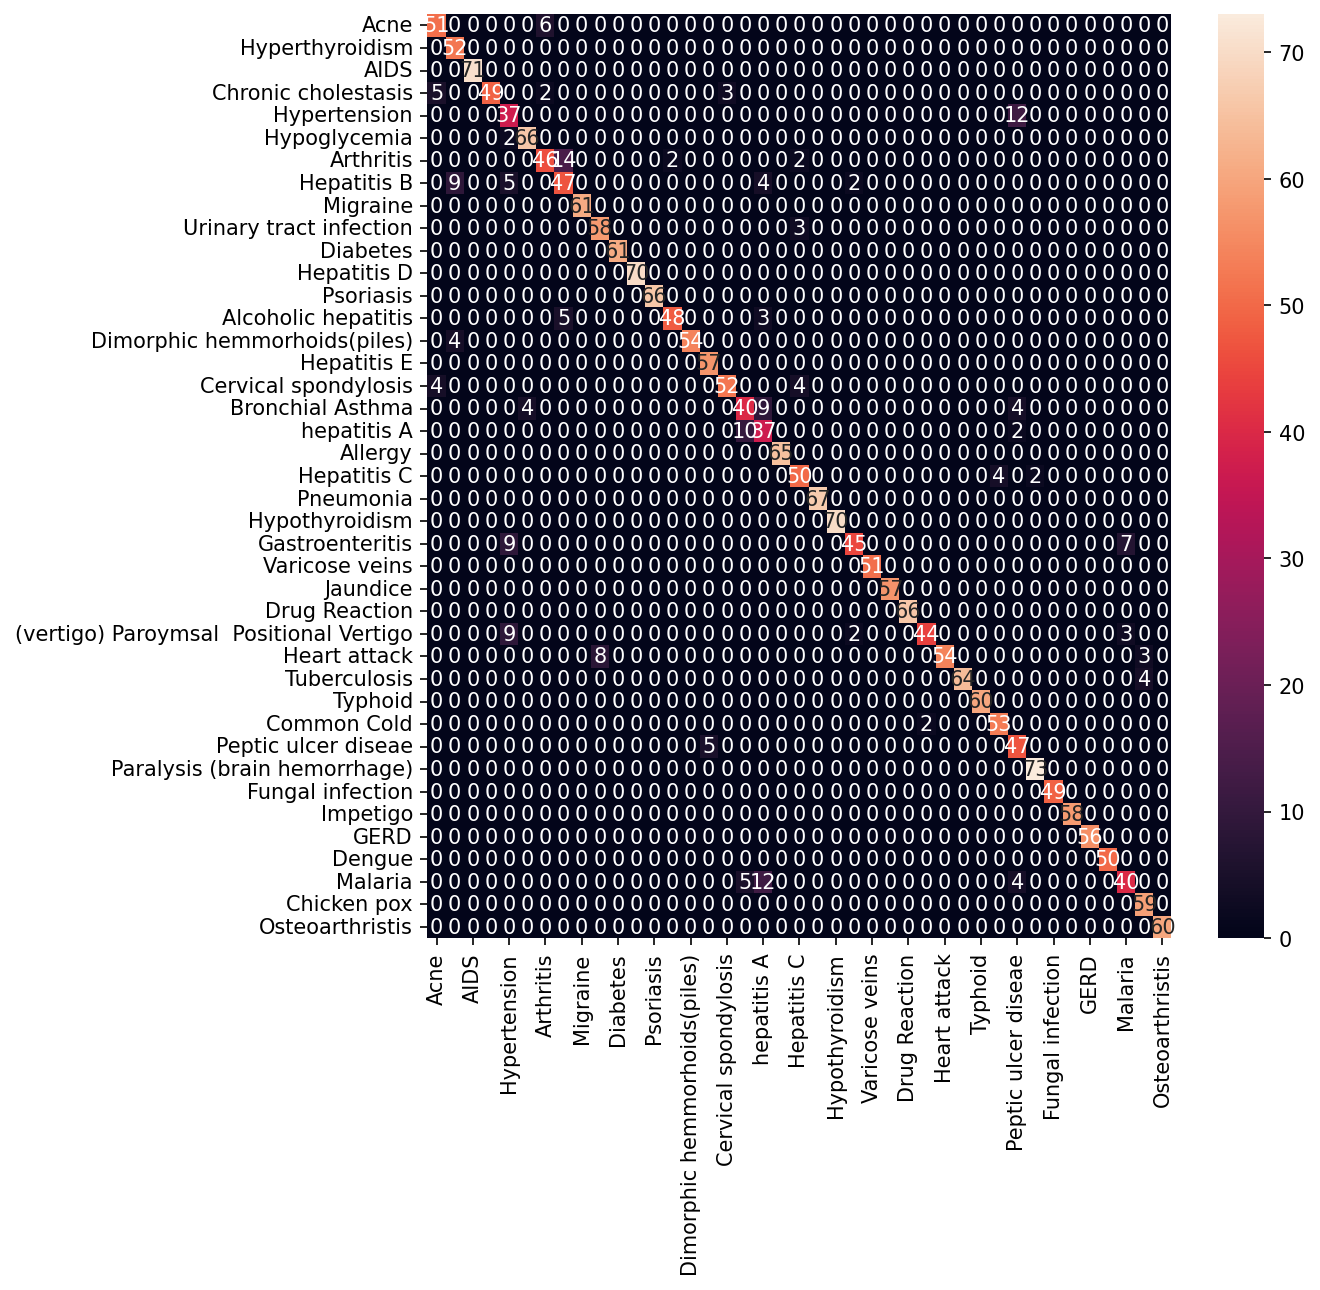

In [30]:
confusion_plot(lr_model, x_test, y_test)

In [ ]:
Compute the F1 score, also known as balanced F-score or F-measure.¶
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is

In [43]:
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=9)
tree.fit(x_train, y_train)
preds=tree.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
create_report(tree, x_test, y_test)

# print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
# sns.heatmap(df_cm)

Accuracy : 86.2602 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.77      0.87        57
                                   AIDS       1.00      1.00      1.00        52
                                   Acne       0.93      1.00      0.97        71
                    Alcoholic hepatitis       1.00      0.85      0.92        59
                                Allergy       0.77      0.76      0.76        49
                              Arthritis       1.00      0.76      0.87        68
                       Bronchial Asthma       0.39      1.00      0.56        64
                   Cervical spondylosis       0.61      0.30      0.40        67
                            Chicken pox       0.95      1.00      0.98        61
                    Chronic cholestasis       1.00      0.95      0.97        61
                            Common Cold       1.00      1.00 

C:\Users\criti\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\criti\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\criti\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

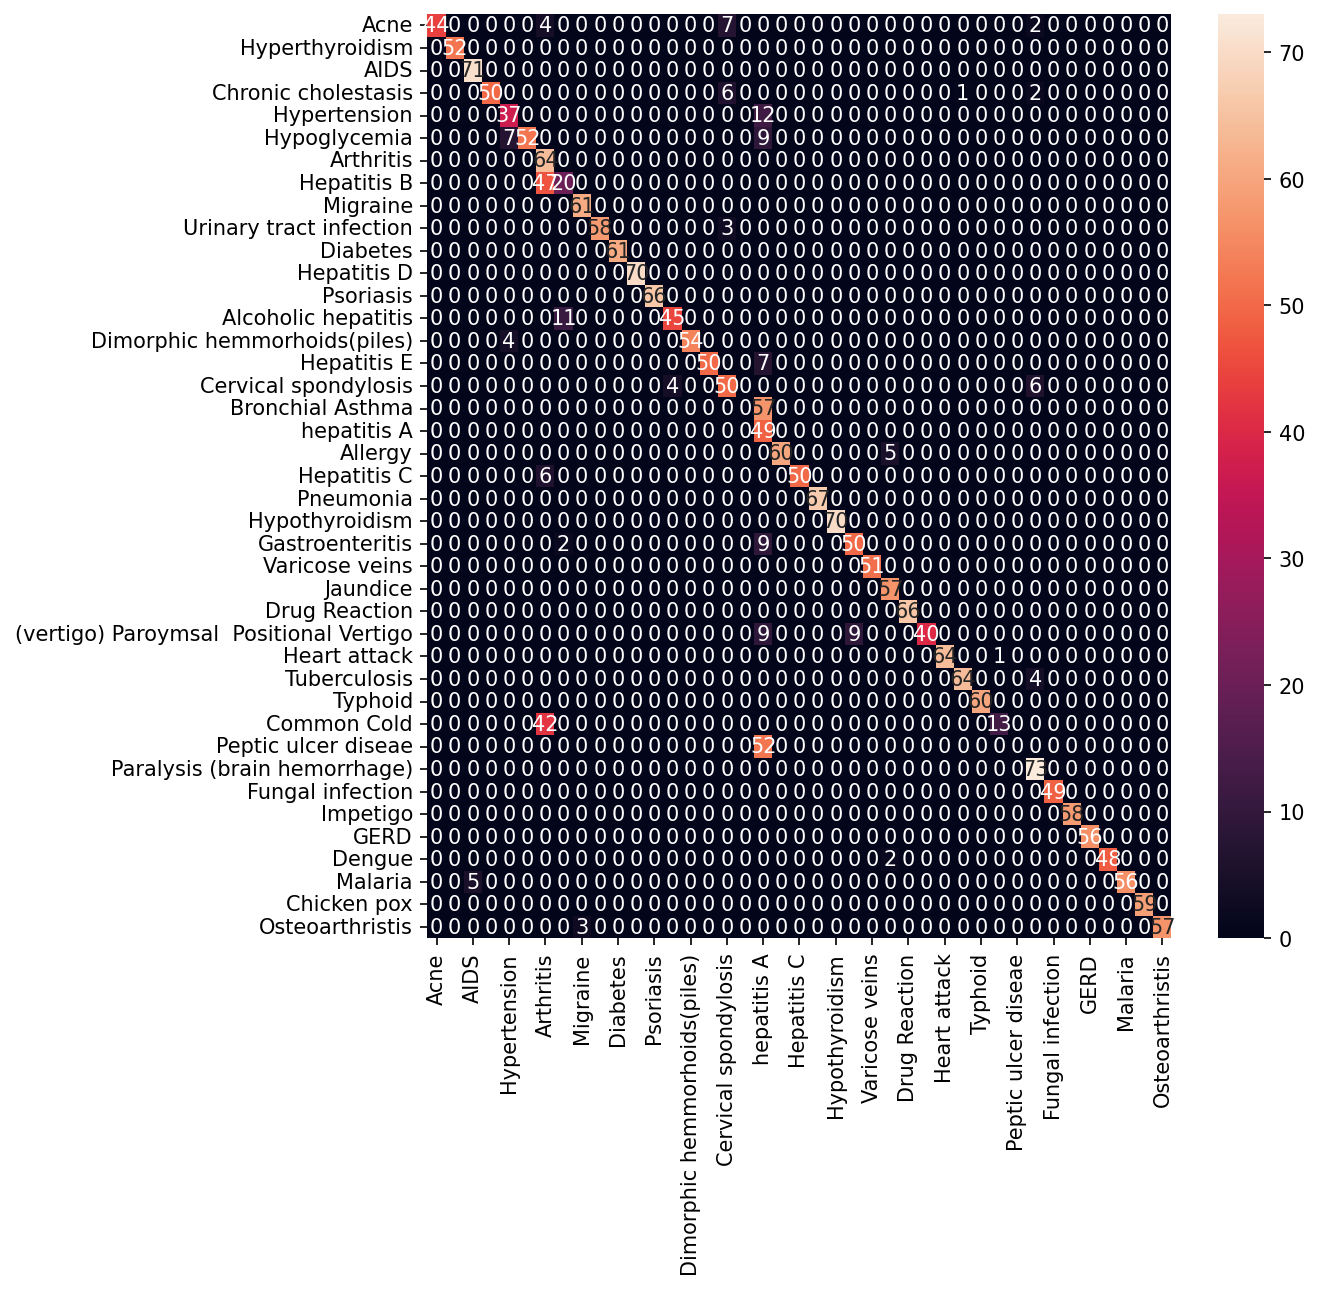

In [44]:
confusion_plot(tree, x_test, y_test)

In [45]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 83.374%, Standard Deviation: (2.66%)


In [46]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(tree, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

Mean Accuracy: 76.016%, Standard Deviation: (6.43%)


Random Forest

In [48]:
rfc=RandomForestClassifier(random_state=42)

F1-score% = 90.64378910779885 | Accuracy% = 90.48780487804878


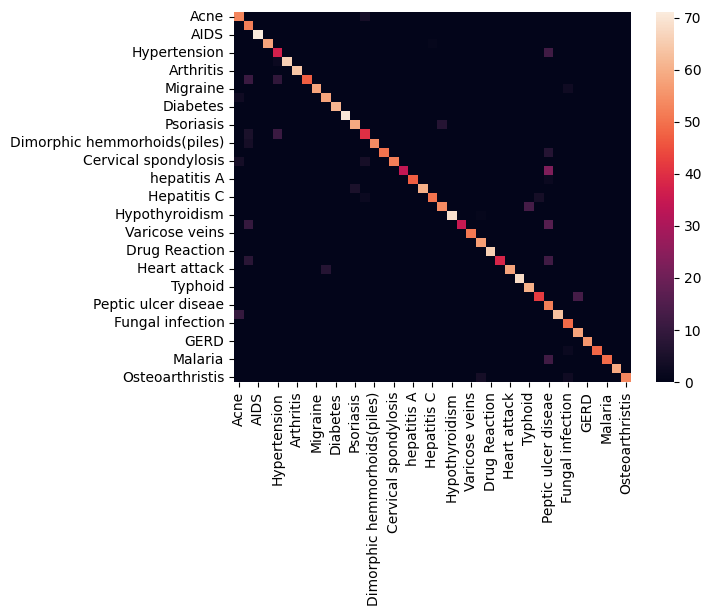

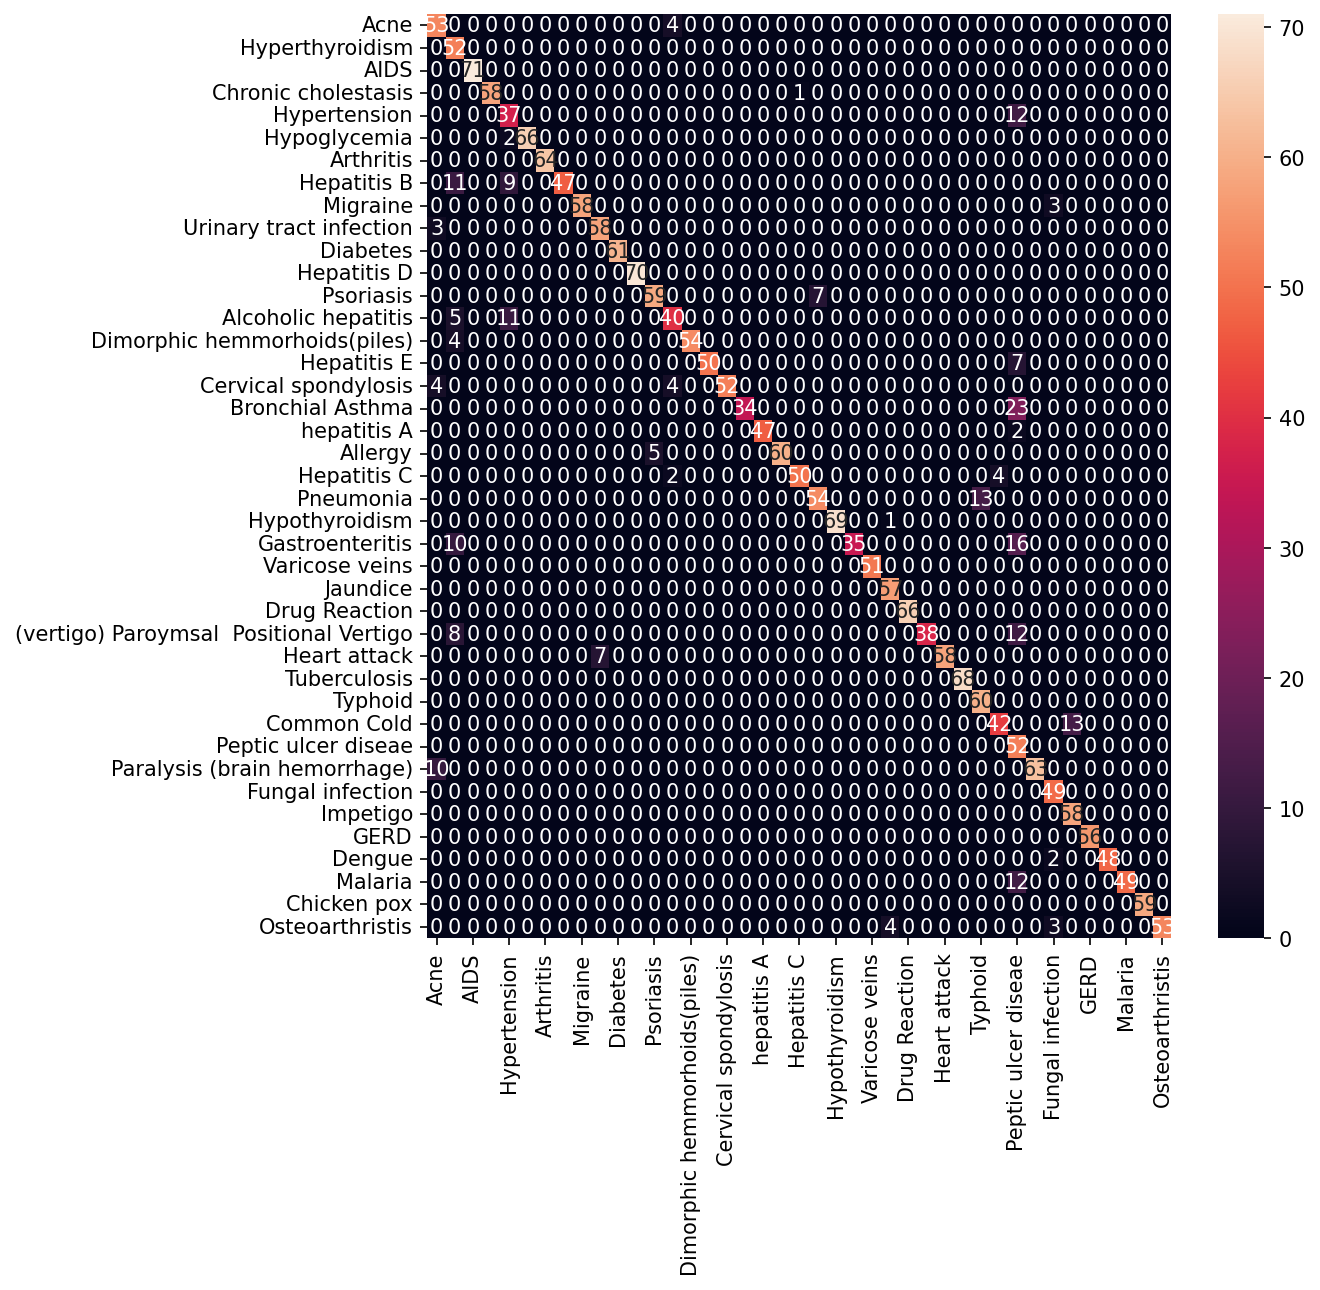

In [58]:
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=4)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
# print(x_test[0])
# print(preds[0])
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
# sns.heatmap(df_cm)
confusion_plot(rnd_forest, x_test, y_test)

In [37]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 89.187%, Standard Deviation: (1.78%)


In [38]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

Mean Accuracy: 87.886%, Standard Deviation: (2.90%)


SVM

In [60]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [61]:
create_report(svc_model, x_test, y_test)

Accuracy : 92.0325 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.78      0.89      0.84        57
                                   AIDS       0.93      1.00      0.96        52
                                   Acne       1.00      1.00      1.00        71
                    Alcoholic hepatitis       0.98      0.76      0.86        59
                                Allergy       0.60      0.76      0.67        49
                              Arthritis       1.00      0.91      0.95        68
                       Bronchial Asthma       0.91      0.62      0.74        64
                   Cervical spondylosis       0.78      0.76      0.77        67
                            Chicken pox       1.00      1.00      1.00        61
                    Chronic cholestasis       0.79      0.95      0.87        61
                            Common Cold       1.00      1.00 

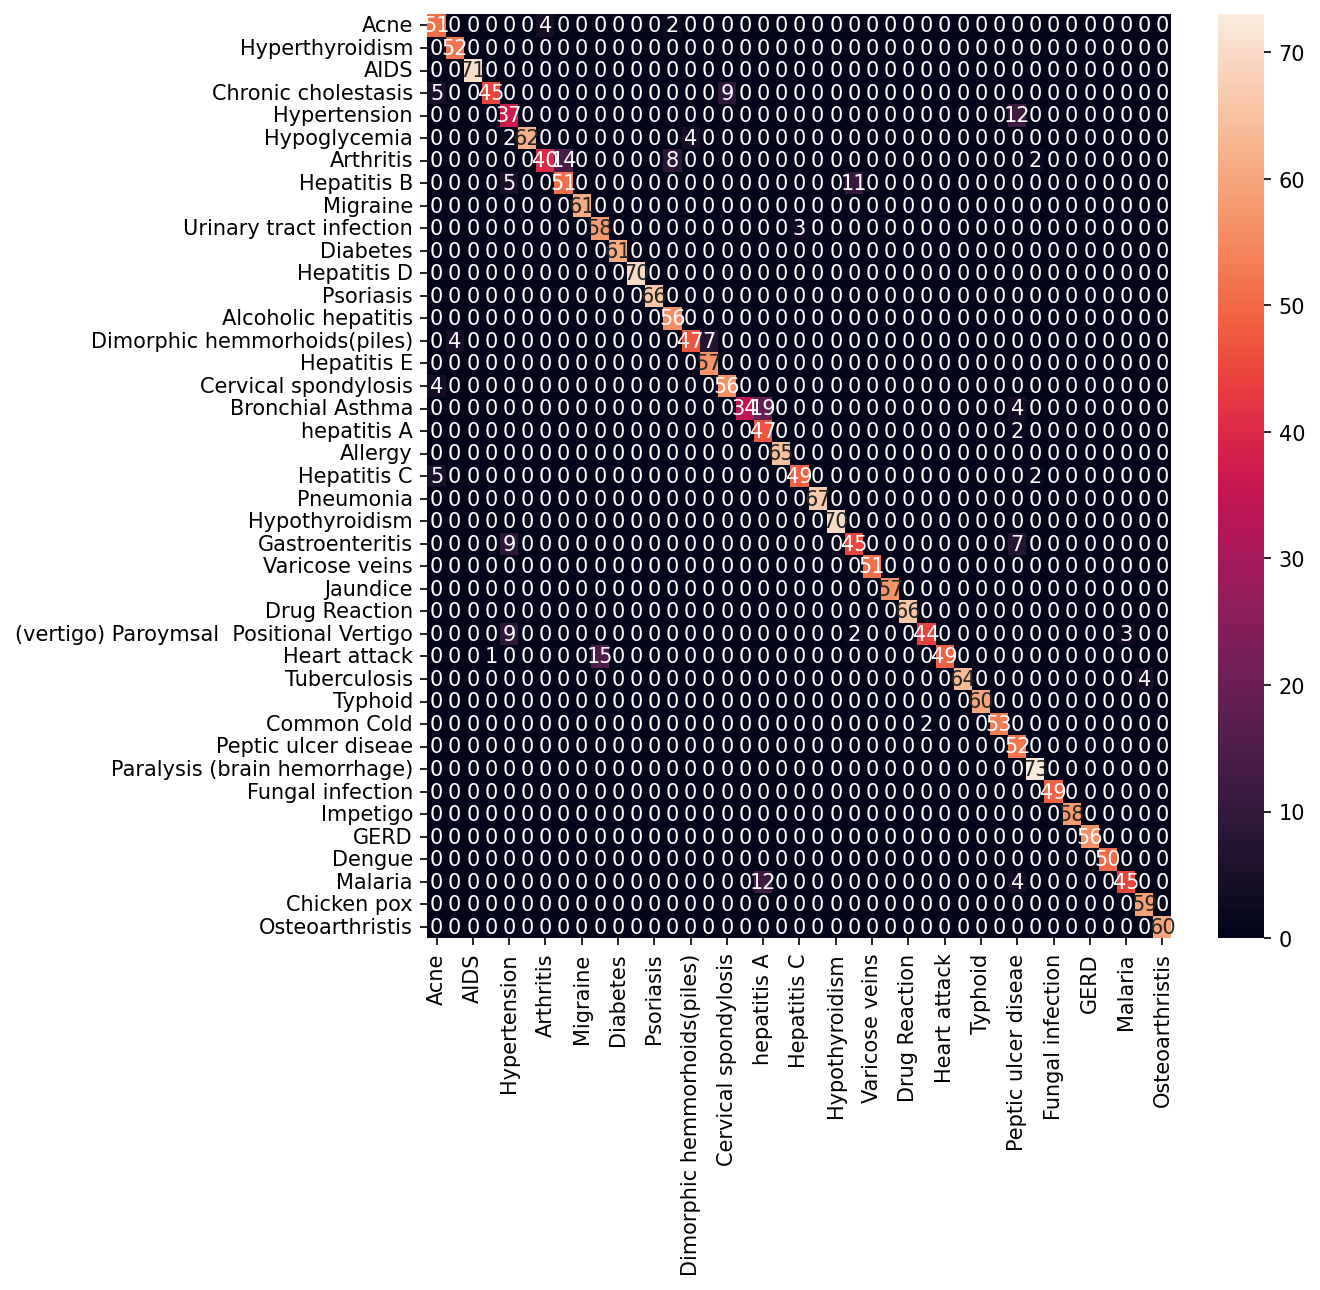

In [63]:
confusion_plot(svc_model, x_test, y_test)


In [76]:
create_report(rnd_forest, x_test, y_test)


Accuracy : 91.0569 %

Classification report: 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.76      0.89      0.82        18
                                   AIDS       0.57      1.00      0.73        20
                                   Acne       1.00      1.00      1.00        32
                    Alcoholic hepatitis       1.00      0.97      0.98        29
                                Allergy       0.62      0.84      0.71        19
                              Arthritis       1.00      0.97      0.98        31
                       Bronchial Asthma       1.00      1.00      1.00        28
                   Cervical spondylosis       1.00      0.80      0.89        30
                            Chicken pox       1.00      0.93      0.96        27
                    Chronic cholestasis       0.86      0.95      0.90        19
                            Common Cold       1.00      1.00 

In [72]:
discrp = pd.read_csv("./data/symptom_Description.csv")
discrp.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [73]:
preaca = pd.read_csv("./data/symptom_precaution.csv")
preaca.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [71]:
def predict(x,S1=' ',S2=' ',S3=' ',S4=' ',S5=' ',S6=' ',S7=' ',S8=' ',S9=' ',S10=' ',S11=' ',S12=' ',S13=' ',S14=' ',S15=' ',S16=' ',S17=' '):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    #print(psymptoms)
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]
            if psymptoms[j]==' ':
                psymptoms[j]=0
    psy = [psymptoms]
    pred2 = x.predict(psy)
    disp= discrp[discrp['Disease']==pred2[0]]
    disp = disp.values[0][1]
    recomnd = preaca[preaca['Disease']==pred2[0]]
    c=np.where(preaca['Disease']==pred2[0])[0][0]
    precuation_list=[]
    for i in range(1,len(preaca.iloc[c])):
        precuation_list.append(preaca.iloc[c,i])
    print("The Disease Name: ",pred2[0])
    print("The Disease Discription: ",disp)
    print("Recommended Things to do at home: ")
    for i in precuation_list:
        print(i)
    return pred2 ,disp,precuation_list

Prediction using random forest

In [74]:
symptoms = ['vomiting', 'weight loss', 'excessive hunger', 'irritability']

# Call the predict function
result = predict(rnd_forest, *symptoms)

# Display results
print(f"Disease Predicted: {result[0][0]}")
print(f"Description: {result[1]}")
print("Recommendations:")
for rec in result[2]:
    print(f"- {rec}")

The Disease Name:  Paralysis (brain hemorrhage)
The Disease Discription:  Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Recommended Things to do at home: 
massage
eat healthy
exercise
consult doctor
Disease Predicted: Paralysis (brain hemorrhage)
Description: Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Recommendations:
- massage
- eat healthy
- exercise
- consult doctor


Prediction using Decision tree

In [51]:
result = predict(tree, *symptoms)

# Display results
print(f"Disease Predicted: {result[0][0]}")
print(f"Description: {result[1]}")
print("Recommendations:")
for rec in result[2]:
    print(f"- {rec}")

The Disease Name:  Paralysis (brain hemorrhage)
The Disease Discription:  Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Recommended Things to do at home: 
massage
eat healthy
exercise
consult doctor
Disease Predicted: Paralysis (brain hemorrhage)
Description: Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Recommendations:
- massage
- eat healthy
- exercise
- consult doctor


Prediction using Soft voting

In [75]:
result = predict(svc_model, *symptoms)

# Display results
print(f"Disease Predicted: {result[0][0]}")
print(f"Description: {result[1]}")
print("Recommendations:")
for rec in result[2]:
    print(f"- {rec}")

The Disease Name:  Paralysis (brain hemorrhage)
The Disease Discription:  Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Recommended Things to do at home: 
massage
eat healthy
exercise
consult doctor
Disease Predicted: Paralysis (brain hemorrhage)
Description: Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Recommendations:
- massage
- eat healthy
- exercise
- consult doctor
